<a href="https://colab.research.google.com/github/aymanmostafa11/signature-identifiation-and-verification/blob/main/Signature_Verification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# doesn't work for some reason
# import gdown
# gdown.download_folder('https://drive.google.com/drive/folders/1hPuQ7XY90lVnIeJgWzQyuk1WTnZCdgXL?usp=sharing')

In [8]:
import os
import numpy as np
import pandas as pd
import glob
import random
import cv2
from matplotlib import pyplot as plt

random.seed(42)

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
TRAIN_PATH = '/content/drive/MyDrive/train_test_dataset/train'
TEST_PATH = '/content/drive/MyDrive/train_test_dataset/test'

In [12]:
def read_folders(root_path):
  return glob.glob(root_path + '/*', recursive = True)

### Creating Triplets
Every sample consists of a (anchor, positive, negative) triplet.

In [13]:
def create_triplets(folders_list):

  triplets = []

  for folder in folders_list:
    os.chdir(folder)
    labels_path = [file for file in glob.glob('*.csv')][0]
    labels_dict = pd.read_csv(labels_path, index_col=0, squeeze=True).to_dict()
    forged_list = [dict_item for dict_item in labels_dict if labels_dict[dict_item] == 'forged']
    real_list = [dict_item for dict_item in labels_dict if labels_dict[dict_item] == 'real']
    
    for i in range(len(real_list)):
      for j in range(len(real_list)):
        if i==j:
          continue
        anchor = real_list[i]
        positive = real_list[j]
        for negative in forged_list:
          triplets.append([folder, (anchor, positive, negative)])

  random.shuffle(triplets)
  
  return triplets

In [14]:
train_triplets = create_triplets(read_folders(TRAIN_PATH))

In [17]:
print(len(train_triplets))
images = []
for i in range(5):
  folder, (a, p, n) = train_triplets[i]
  images.append([folder, a, p, n])
  print(train_triplets[i])

38000
['/content/drive/MyDrive/train_test_dataset/train/personC', ('personC_24.png', 'personC_45.png', 'personC_44.png')]
['/content/drive/MyDrive/train_test_dataset/train/personD', ('personD_48.png', 'personD_36.png', 'personD_11.png')]
['/content/drive/MyDrive/train_test_dataset/train/personD', ('personD_39.png', 'personD_20.png', 'personD_4.png')]
['/content/drive/MyDrive/train_test_dataset/train/personD', ('personD_46.png', 'personD_20.png', 'personD_10.png')]
['/content/drive/MyDrive/train_test_dataset/train/personB', ('personB_41.png', 'personB_26.png', 'personB_45.png')]


### Visualizing The Data

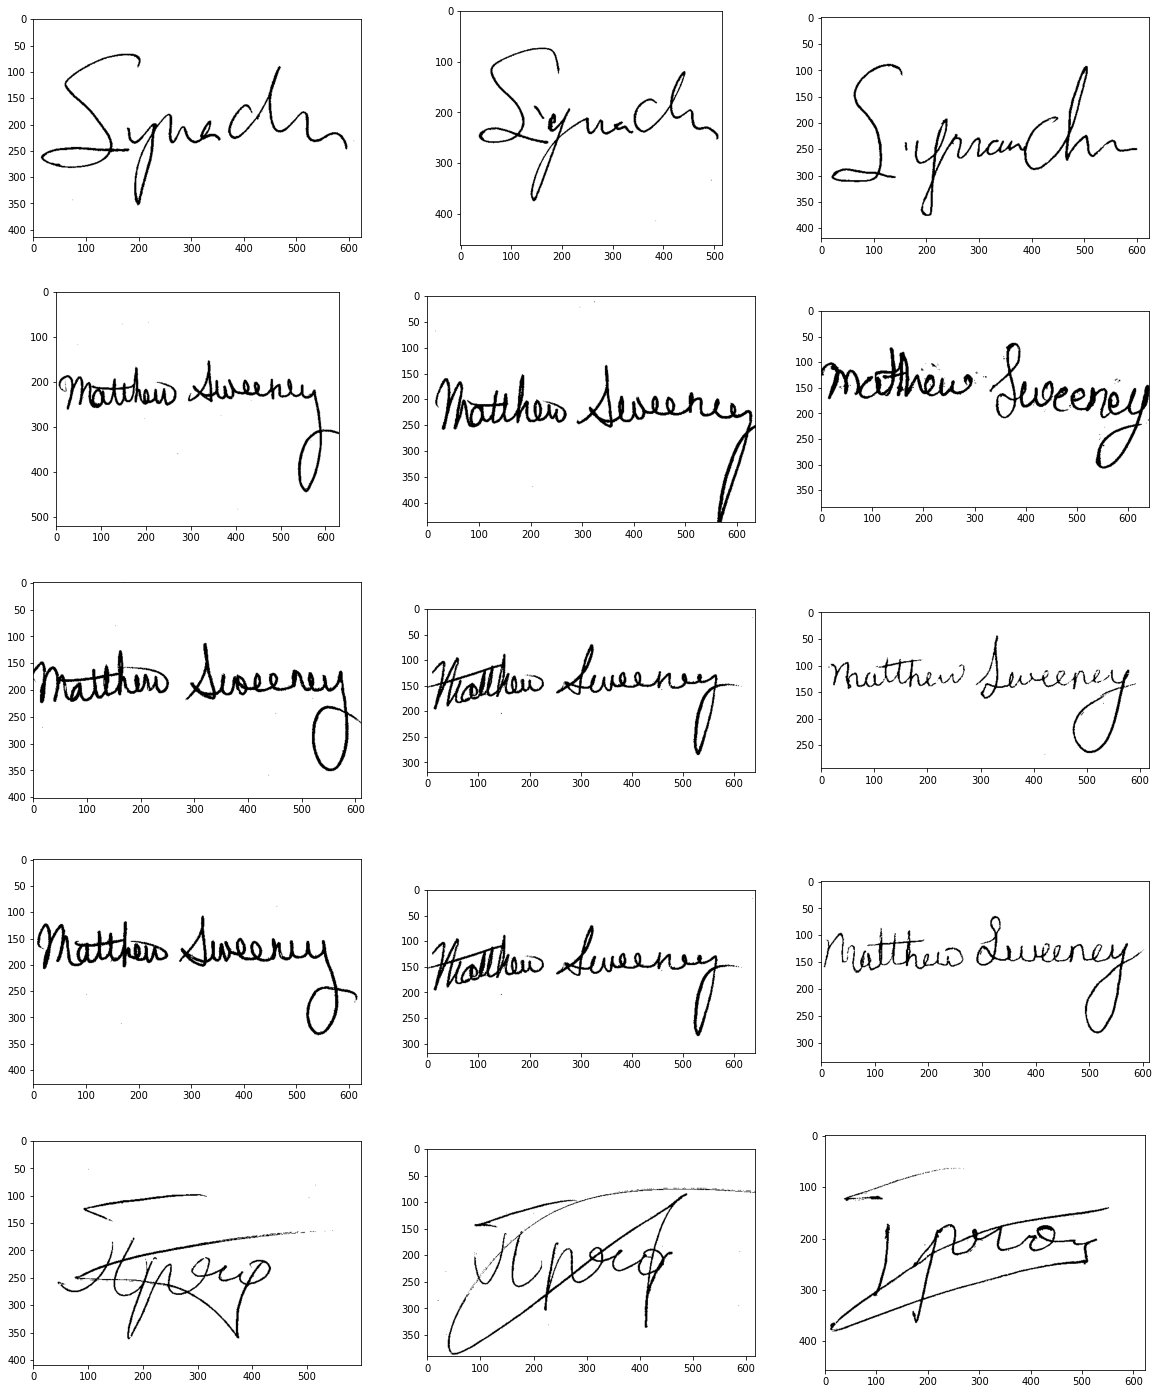

In [18]:
rows = 5
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(20, 25))

for i in range(rows):
  axes[i, 0].imshow(plt.imread(images[i][0]+'/'+images[i][1]))
  axes[i, 1].imshow(plt.imread(images[i][0]+'/'+images[i][2]))
  axes[i, 2].imshow(plt.imread(images[i][0]+'/'+images[i][3]))


In [32]:
def read_image(image_name, folder_path):
  path = os.path.join(folder_path, image_name)
  image = cv2.imread(path, 0)
  return image

In [35]:
def batch_generator(triplets, batch_size = 256):

  num_of_batches = len(triplets)//batch_size

  for i in range(num_of_batches):
    batch = []
    for j in range(i*batch_size, i*(batch_size+1)):
      folder, (a, p, n) = triplets[j]
      a = read_image(a, folder)
      p = read_image(p, folder)
      n = read_image(n, folder)
      batch.append([a,p,n])
    yield batch